##### This chapter covers
- Running pretrained image-recognition models 🐈 🐕
- An introduction to GANs and CycleGAN 🌀
- Captioning models that can produce text descriptions of images 🦜
- Sharing models through Torch Hub 🏬

In [1]:
from torchvision import models

c:\Users\muthu\miniconda3\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(f'number of available models:: {dir(models)}')

4060

ImageNet Large Scale Visual Recognition Challenge (ILSVRC)
- image classification
- object detection
- object localization
- scene classification
- scene parsing


In Image, It is an RGB image with height and width, so this tensor will have three dimensions: the three color channels, and two spatial image dimensions of a specific size.


In [3]:
alexnet = models.AlexNet()#2012

In [4]:
resnet  = models.resnet101(pretrained=True)  #instance of ResNet
# Trained over 1.2 million images and 1000 categories

c:\Users\muthu\miniconda3\envs\tfenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\muthu\miniconda3\envs\tfenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


![resnet101](../assets/resnet101.png)

In [5]:
print(resnet) #layers in DL

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485,0.456,0.406),
        std=(.229,.224,.225)
    )
])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=487x430 at 0x1A4904868C0>


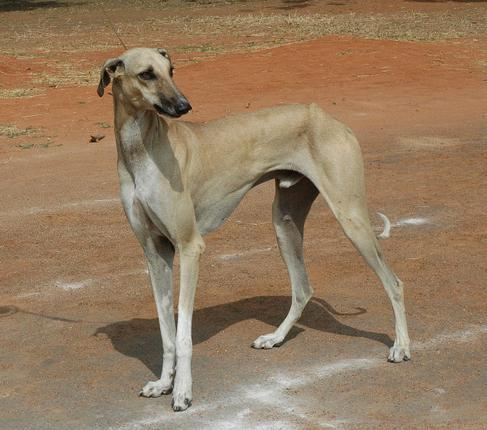

In [7]:
from PIL import Image
img = Image.open("../assets/sippiparai-dog-breed-tamilnadu.jpg")
print(img)
img

In [8]:
img_t = preprocess(img)
print(img_t.shape, type(img_t))
print(img_t)

torch.Size([3, 224, 224]) <class 'torch.Tensor'>
tensor([[[ 0.1597,  0.0569,  0.0056,  ...,  0.2624,  0.2967,  0.3652],
         [ 0.1597,  0.1597,  0.1083,  ...,  0.4337,  0.3481,  0.3823],
         [ 0.1597,  0.1939,  0.1597,  ...,  0.3994,  0.2796,  0.3652],
         ...,
         [ 0.3652,  0.3652,  0.3823,  ...,  0.3481,  0.3994,  0.3823],
         [ 0.4166,  0.3138,  0.2111,  ...,  0.3823,  0.4508,  0.4337],
         [ 0.2967,  0.1939,  0.1939,  ...,  0.4337,  0.4679,  0.4508]],

        [[-0.1800, -0.2500, -0.3025,  ..., -0.1099, -0.0749, -0.0049],
         [-0.1975, -0.1800, -0.1975,  ...,  0.0651, -0.0224,  0.0126],
         [-0.1975, -0.1450, -0.1625,  ...,  0.0126, -0.0924, -0.0049],
         ...,
         [ 0.2052,  0.2402,  0.3102,  ...,  0.2227,  0.2752,  0.2402],
         [ 0.3627,  0.2927,  0.1877,  ...,  0.3277,  0.3978,  0.3452],
         [ 0.2752,  0.1527,  0.1527,  ...,  0.3803,  0.3978,  0.3627]],

        [[-0.4798, -0.5670, -0.6193,  ..., -0.4450, -0.4101, -0.340

In [9]:
import torch
batch_t = torch.unsqueeze(img_t, 0) # makes into batch
print(batch_t.shape)

torch.Size([1, 3, 224, 224])


In [10]:
resnet.eval()  #inference mode. BN,dropout->gone
out = resnet(batch_t)
out  # produce results of 1000 class
print(out.shape)

torch.Size([1, 1000])


In [11]:
with open('../assets/imgnet_classes.txt') as f:
    labels:list  =[line.strip() for line in f.readlines()]

In [12]:
_,index = torch.max(out,1)  #where maximun value occured.
print(index,type(index))

tensor([176]) <class 'torch.Tensor'>


In [13]:
percentage = torch.nn.functional.softmax(out,dim=1)[0] * 100 
print(labels[index[0]], percentage[index[0]].item())

Saluki, gazelle hound 69.62806701660156


In [14]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:10]]

[('Saluki, gazelle hound', 69.62806701660156),
 ('whippet', 25.58785057067871),
 ('Great Dane', 1.8945071697235107),
 ('Ibizan hound, Ibizan Podenco', 1.5414152145385742),
 ('Italian greyhound', 0.4824991822242737),
 ('borzoi, Russian wolfhound', 0.2468184381723404),
 ('English foxhound', 0.17606393992900848),
 ('Afghan hound, Afghan', 0.12066954374313354),
 ('Scottish deerhound, deerhound', 0.08176496624946594),
 ('Rhodesian ridgeback', 0.043623972684144974)]

## The GAN game 

In the context of deep learning, what we’ve just described is known as the GAN game, where two networks, one acting as the painter and the other as the art historian, compete to outsmart each other at creating and detecting forgeries. 
    
GAN stands for generative adversarial network, where generative means something is being created (in thiscase, fake masterpieces), adversarial means the two networks are competing to outsmart the other, and well, network is pretty obvious.

Remember that our overarching goal is to produce synthetic examples of a class of images that cannot be recognized as fake. When mixed in with legitimate examples, a skilled examiner would have trouble determining which ones are real and which are our forgeries.

The generator network takes the role of the painter in our scenario, tasked with producing realistic-looking images, starting from an arbitrary input. The discriminator network is the amoral art inspector, needing to tell whether a given image was fabricated by the generator or belongs in a set of real images. 
    
This two-network design is atypical for most deep learning architectures but, when used to implement a GAN game, can lead to incredible results.

The end goal for the generator is to fool the discriminator into mixing up real and fake images. The end goal for the discriminator is to find out when it’s being tricked, but it also helps inform the generator about the identifiable mistakes in the generated images. 

At the start, the generator produces confused, three-eyed monsters that look nothing like a Rembrandt portrait. The discriminator is easily able to distinguish the muddled messes from the real paintings. As training progresses, information flows back from the discriminator, and the generator uses it to improve. By the end of training, the generator is able to produce convincing fakes, and the discriminator no longer is able to tell which is which.


Note that “Discriminator wins” or “Generator wins” shouldn’t be taken literally there’s no explicit tournament between the two
However, both networks are trained based on the outcome of the other network, which drives the optimization of the parameters of each network.


![GanGame](../assets/fakeituntilmakeit.png)



A CycleGAN can turn images of one domain into images of another domain (and back), without the need for us to explicitly provide matching pairs in the training set.

https://huggingface.co/datasets/huggan/horse2zebra 🐎2🦓
![cyclegan](../assets/cyclegan.png) 

In [15]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)


netG = ResNetGenerator()
model_path = r'../assets/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [16]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

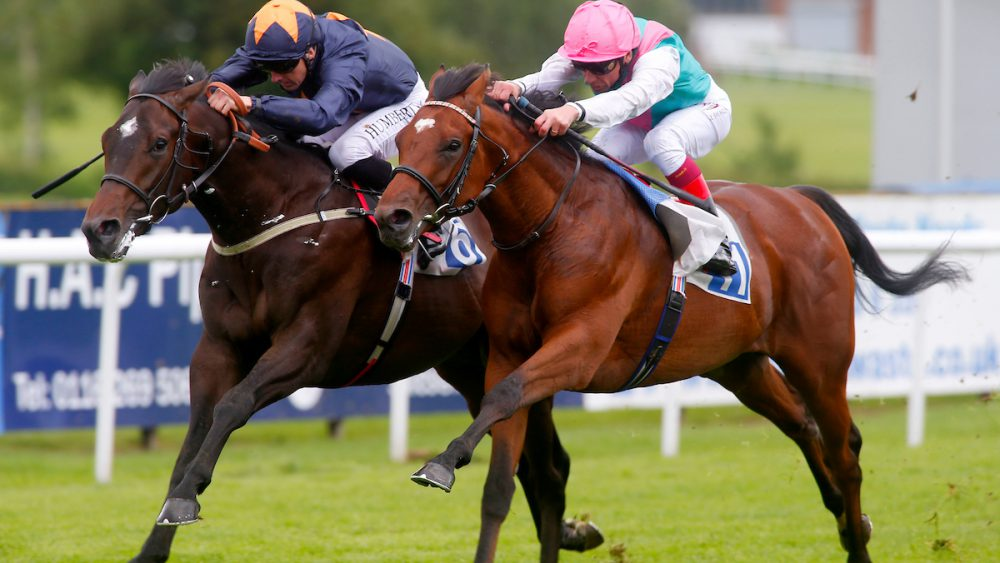

In [17]:
from PIL import Image
from torchvision import transforms
preprocess = transforms.Compose([transforms.Resize(256),transforms.ToTensor()])
horse_img = Image.open('../assets/horse_race.jpg')
horse_img

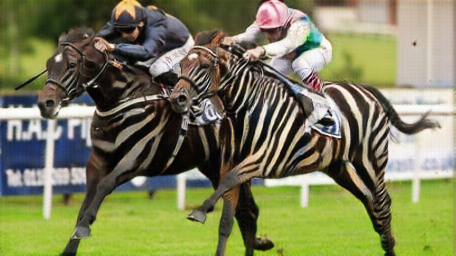

In [18]:
img_t = preprocess(horse_img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img

Generative adversarial networks (GANs) have two parts—the generator and the discriminator—that work together to produce output indistinguishable from authentic items.

[ImageCap](https://github.com/deep-learning-with-pytorch/ImageCaptioning.pytorch)

![Describe Scene](../assets/ImageCaptioning.png)

[NeuralTalk2 by karapathy](https://github.com/deep-learning-with-pytorch/ImageCaptioning.pytorch)
hybrid model architecture to consume an image and produce a text description of the image.

[pdf](https://cs.stanford.edu/people/karpathy/cvpr2015.pdf)


bookmarked 📑([Unet](https://github.com/milesial/Pytorch-UNet))